In [50]:
library(MASS)
library(lmtest)
library(gridExtra)
library(tidyverse)
library(readxl)

In [7]:
library(ggcorrplot)

In [8]:
getwd()
list.files()

[1] "/Users/xuren/pydev/p1_udj_assignments/s11_forecasting"

[1] "S11 UDJ SALES.xls" "s11_sales.ipynb"

In [9]:
sales_tibble = read_excel("S11 UDJ SALES.xls")

In [10]:
head(sales_tibble)

PDI,DEALS,PRICE,R&D,INVEST,ADVERTIS,EXPENSE,TOTINDAD,SALES
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
398,138,56.20,12.11,49.89,76.86,228.80,98.20,5540.39
369,118,59.04,9.33,16.59,88.81,177.45,224.95,5439.04
268,129,56.72,28.75,89.18,51.30,166.40,263.03,4290.00
484,111,57.86,12.89,106.73,39.65,258.05,320.93,5502.34
394,146,59.11,13.38,142.55,51.65,209.30,406.99,4871.77
332,140,60.11,11.09,61.28,20.55,180.05,247.00,4708.08


In [11]:
cor(sales_tibble %>% dplyr::select(-SALES))

,PDI,DEALS,PRICE,R&D,INVEST,ADVERTIS,EXPENSE,TOTINDAD
PDI,1.00000000,-0.051975827,0.58178908,0.162751135,0.10655595,0.2057018,0.90171491,-0.05611052
DEALS,-0.05197583,1.000000000,0.04420068,0.008085699,-0.09995092,-0.1095744,-0.04090428,-0.15276542
PRICE,0.58178908,0.044200685,1.00000000,0.437099447,-0.08937882,0.2763723,0.63869001,-0.21352408
R&D,0.16275114,0.008085699,0.43709945,1.000000000,0.16733956,0.1268537,0.36275985,-0.12945738
INVEST,0.10655595,-0.099950919,-0.08937882,0.167339564,1.00000000,0.2380239,0.19561952,-0.10084968
ADVERTIS,0.20570182,-0.109574424,0.27637231,0.126853716,0.23802387,1.0000000,0.14398140,-0.19860114
EXPENSE,0.90171491,-0.040904276,0.63869001,0.362759847,0.19561952,0.1439814,1.00000000,-0.04052942
TOTINDAD,-0.05611052,-0.152765420,-0.21352408,-0.129457379,-0.10084968,-0.1986011,-0.04052942,1.00000000


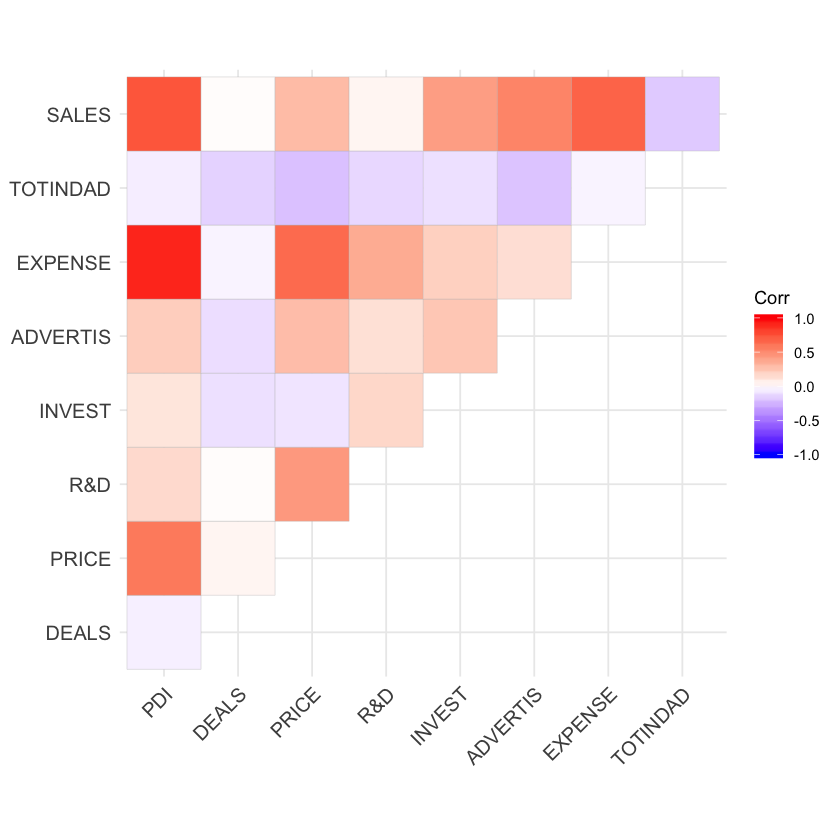

In [12]:
ggcorrplot(cor(sales_tibble), type="upper")

In [13]:
model1 <- lm(SALES ~ ., data = sales_tibble)

In [14]:
summary(model1)


Call:
lm(formula = SALES ~ ., data = sales_tibble)

Residuals:
   Min     1Q Median     3Q    Max 
-385.9 -118.0  -13.0  138.2  462.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3027.6336   572.3599   5.290 9.36e-06 ***
PDI            3.3723     1.4137   2.385   0.0234 *  
DEALS          4.6953     3.0103   1.560   0.1290    
PRICE        -18.1112     7.4927  -2.417   0.0217 *  
`R&D`         -9.9033     6.0021  -1.650   0.1090    
INVEST         1.6895     0.7157   2.361   0.0247 *  
ADVERTIS       8.2907     1.6445   5.042 1.91e-05 ***
EXPENSE        4.4434     2.5076   1.772   0.0862 .  
TOTINDAD      -0.4427     0.3646  -1.214   0.2339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 234.6 on 31 degrees of freedom
Multiple R-squared:  0.8338,	Adjusted R-squared:  0.791 
F-statistic: 19.44 on 8 and 31 DF,  p-value: 4.437e-10


In [15]:
step.model <- stepAIC(model1, direction = "both", 
                      trace = FALSE)
summary(step.model)


Call:
lm(formula = SALES ~ PDI + DEALS + PRICE + `R&D` + INVEST + ADVERTIS + 
    EXPENSE, data = sales_tibble)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.83 -138.75    4.12  118.98  417.08 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2732.9641   522.1804   5.234 1.01e-05 ***
PDI            3.4996     1.4202   2.464   0.0193 *  
DEALS          5.3063     2.9898   1.775   0.0855 .  
PRICE        -16.2325     7.3852  -2.198   0.0353 *  
`R&D`         -9.5020     6.0372  -1.574   0.1253    
INVEST         1.8193     0.7129   2.552   0.0157 *  
ADVERTIS       8.4837     1.6489   5.145 1.30e-05 ***
EXPENSE        4.0191     2.5015   1.607   0.1179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.4 on 32 degrees of freedom
Multiple R-squared:  0.8259,	Adjusted R-squared:  0.7879 
F-statistic: 21.69 on 7 and 32 DF,  p-value: 1.812e-10


In [19]:
# ?stepAIC

In [20]:
final.model <- lm(SALES ~ PDI + PRICE + ADVERTIS + INVEST, data=sales_tibble)

In [21]:
summary(final.model)


Call:
lm(formula = SALES ~ PDI + PRICE + ADVERTIS + INVEST, data = sales_tibble)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.71 -138.10   16.65  190.58  455.81 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3333.3884   363.2868   9.176 7.66e-11 ***
PDI            5.5343     0.7056   7.844 3.22e-09 ***
PRICE        -15.3901     6.5801  -2.339  0.02518 *  
ADVERTIS       7.5453     1.6519   4.568 5.88e-05 ***
INVEST         1.9211     0.6879   2.793  0.00842 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248.7 on 35 degrees of freedom
Multiple R-squared:  0.7892,	Adjusted R-squared:  0.7651 
F-statistic: 32.76 on 4 and 35 DF,  p-value: 2.176e-11


In [22]:
final.model$residuals

1            2            3            4            5            6 
 193.4829551  270.1424815 -212.0615623 -123.4058564 -396.0053732  189.6107118 
           7            8            9           10           11           12 
 111.0932535 -571.7144994  144.2344784  273.7682034  210.2828366   -1.3959927 
          13           14           15           16           17           18 
 141.5177710   42.5378192  412.1309466 -147.8842540 -137.8468448   38.4711287 
          19           20           21           22           23           24 
  34.0144480 -556.9527793 -204.6773646  280.2084267 -299.6166820  -50.4365604 
          25           26           27           28           29           30 
  81.9734261  226.7475246  -80.3240475  119.1484303 -268.2374324  455.8146820 
          31           32           33           34           35           36 
  51.5936621 -236.2308048 -112.4914996  -19.2001704  -85.2775709  248.1073833 
          37           38           39           40 
 -80.5578291  199.0216780   -0.7205461 -138.8645772

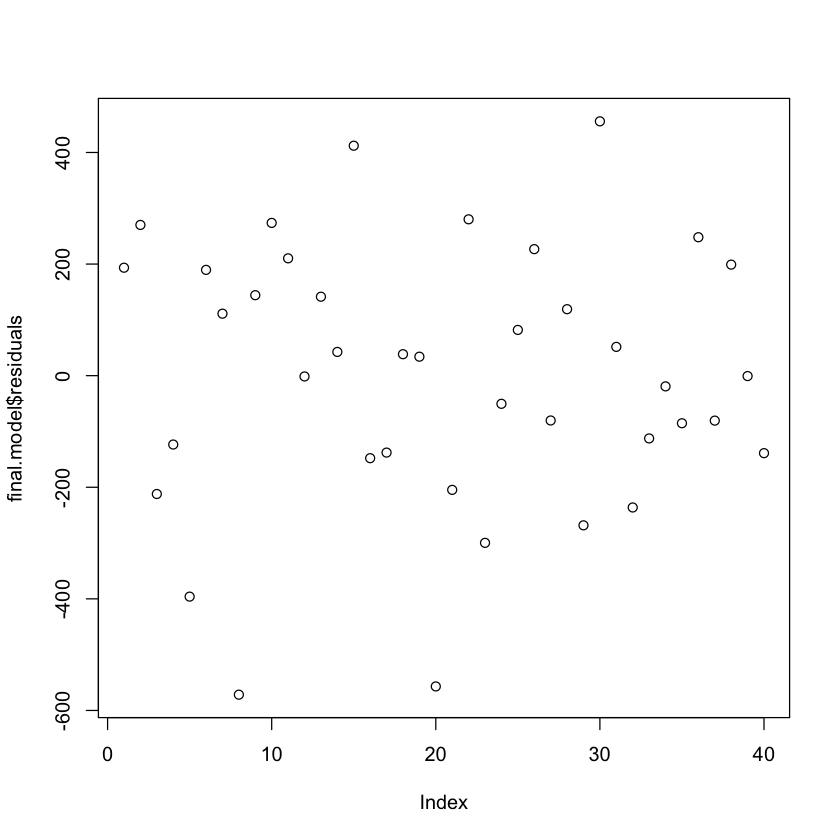

In [23]:
plot(final.model$residuals)

In [24]:
predict(final.model, sales_tibble)

1        2        3        4        5        6        7        8 
5346.907 5168.898 4502.062 5625.746 5267.775 4518.469 4516.717 4681.954 
       9       10       11       12       13       14       15       16 
3978.456 4568.482 5530.367 5095.496 4970.702 5340.662 4476.039 4181.014 
      17       18       19       20       21       22       23       24 
5079.807 5274.329 5105.856 4954.313 5354.147 4870.622 5288.637 5977.297 
      25       26       27       28       29       30       31       32 
4621.907 5138.842 4710.414 5592.712 5363.717 5668.555 4735.746 5271.851 
      33       34       35       36       37       38       39       40 
5400.501 4666.210 5400.908 5931.953 4881.528 5313.108 5272.931 5512.635

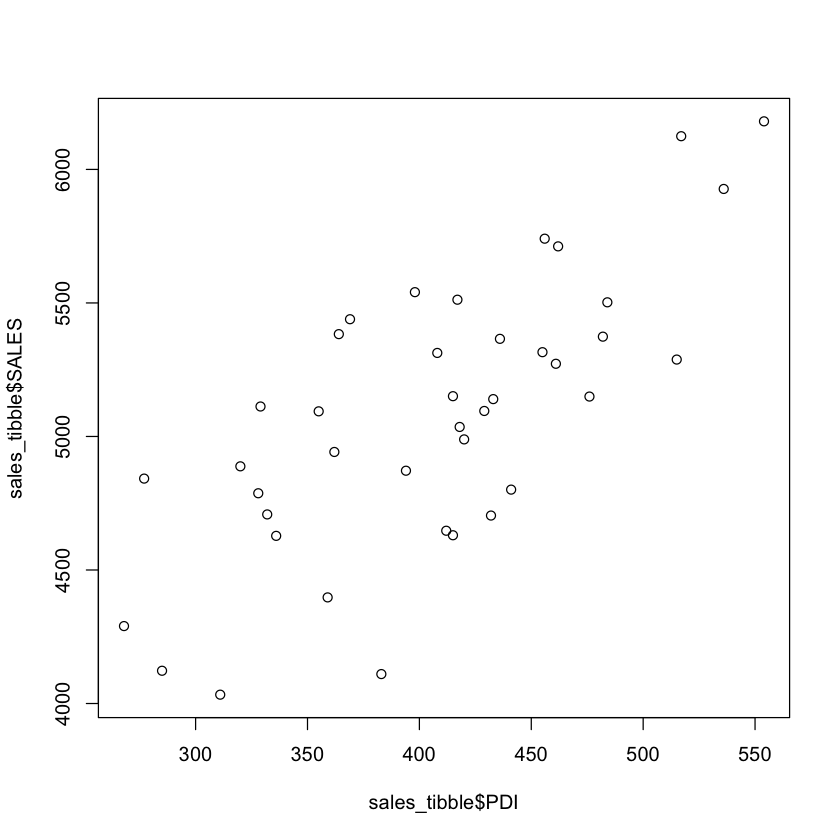

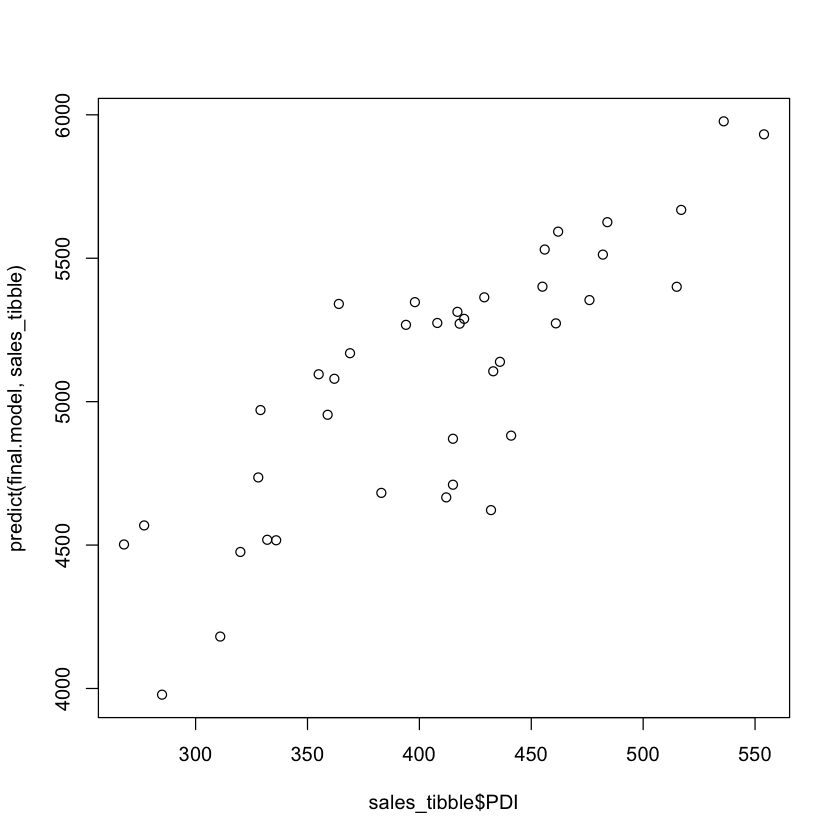

In [25]:
plot(x=sales_tibble$PDI, y=sales_tibble$SALES)
plot(x=sales_tibble$PDI, y=predict(final.model, sales_tibble))

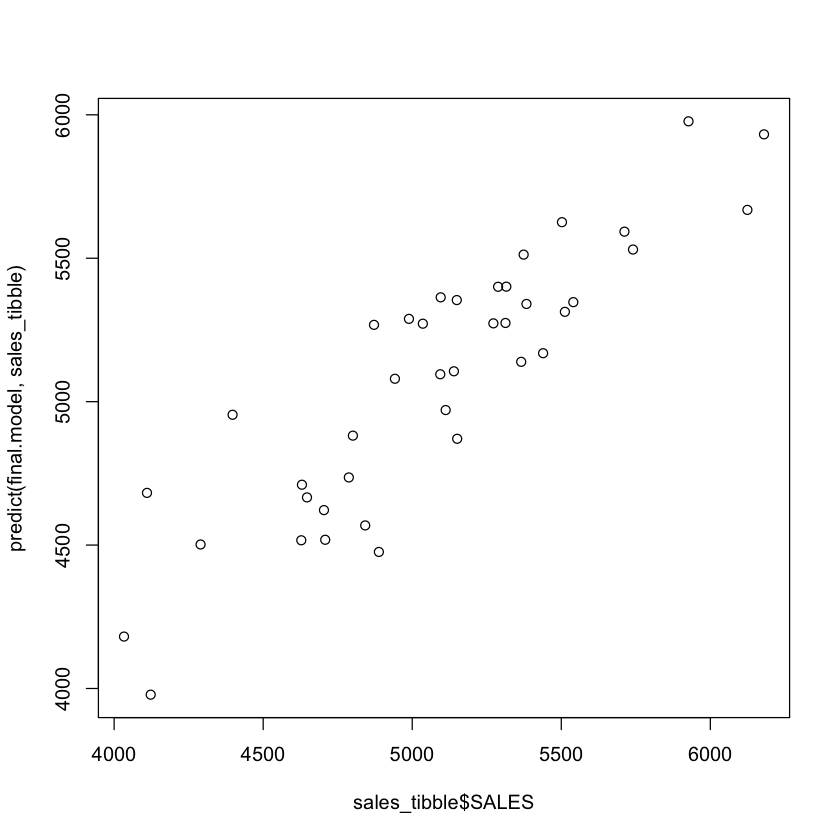

In [26]:
plot(sales_tibble$SALES, predict(final.model, sales_tibble))

In [27]:
dwtest(final.model)


	Durbin-Watson test

data:  final.model
DW = 2.222, p-value = 0.6875
alternative hypothesis: true autocorrelation is greater than 0


In [28]:
dw_stat <- dwtest(final.model)

In [29]:
str(dw_stat)

List of 5
 $ statistic  : Named num 2.22
  ..- attr(*, "names")= chr "DW"
 $ method     : chr "Durbin-Watson test"
 $ alternative: chr "true autocorrelation is greater than 0"
 $ p.value    : num 0.687
 $ data.name  : chr "final.model"
 - attr(*, "class")= chr "htest"


In [30]:
summary(dw_stat)

            Length Class  Mode     
statistic   1      -none- numeric  
method      1      -none- character
alternative 1      -none- character
p.value     1      -none- numeric  
data.name   1      -none- character

In [33]:
length(c(1971:1991))

[1] 21

In [36]:
nrow(sales_tibble)

[1] 40

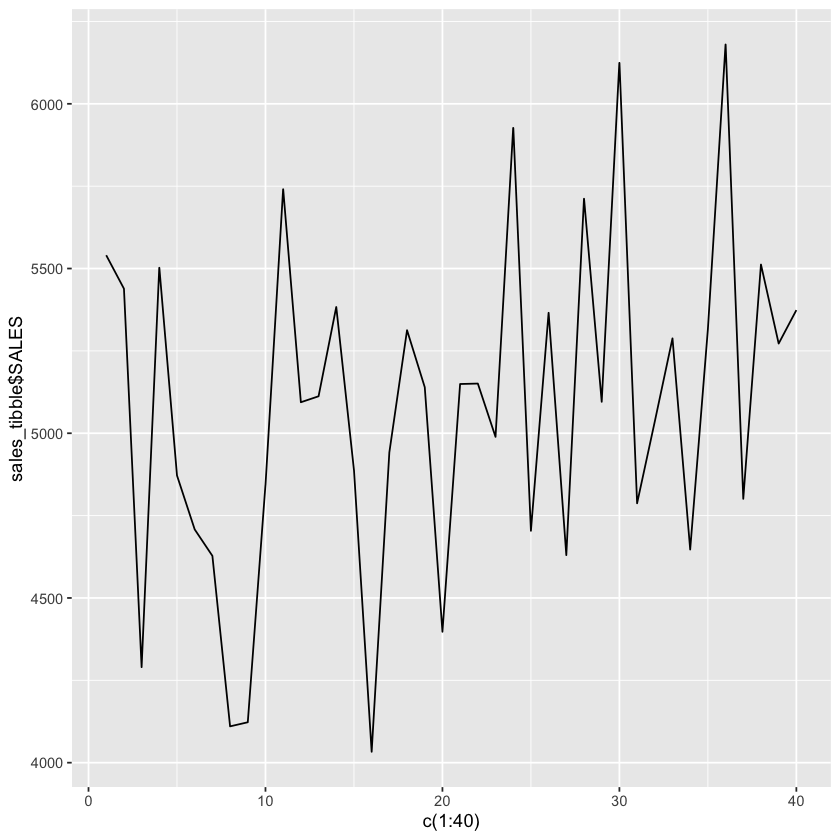

In [40]:
ggplot(data=sales_tibble, aes(x=c(1:40), y=sales_tibble$SALES)) + geom_line()

### Histograms of Residuals against Normal KDE

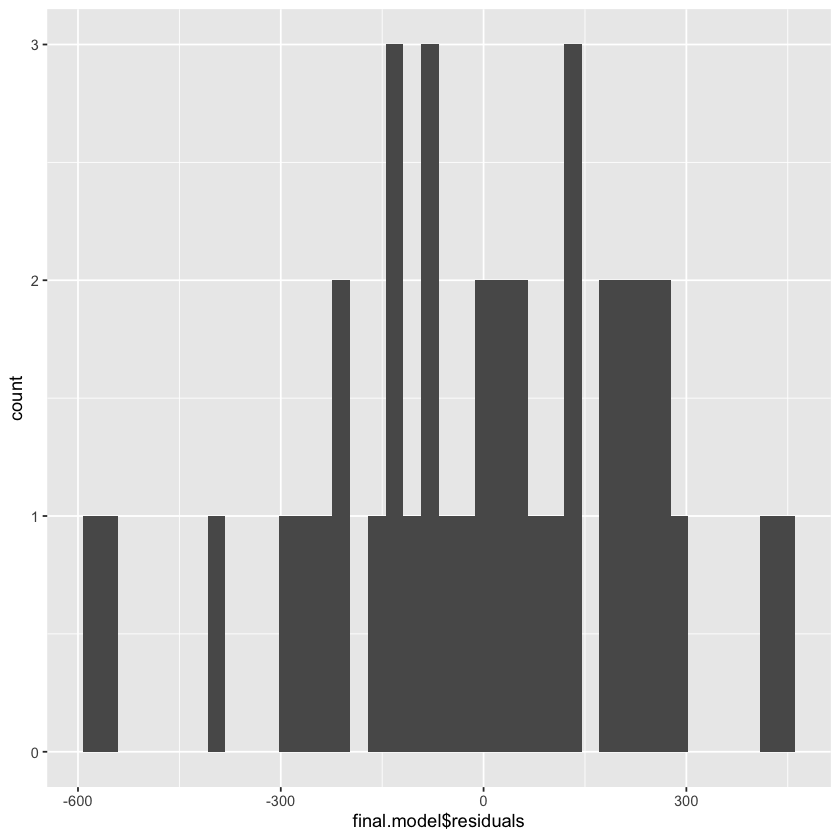

In [45]:
df <- data.frame(PF = 10*rnorm(1000))
ggplot(data=sales_tibble, aes(final.model$residuals)) + 
geom_histogram(bins=40)

Plot residuals against:

- PDI
- Advertising
- Investment
- Price

In [52]:
g1 <- ggplot(data=sales_tibble, aes(x=sales_tibble$PDI, y=final.model$residuals)) + geom_point()
g2 <- ggplot(data=sales_tibble, aes(x=sales_tibble$ADVERTIS, y=final.model$residuals)) + geom_point()
g3 <- ggplot(data=sales_tibble, aes(x=sales_tibble$INVEST, y=final.model$residuals)) + geom_point()
g4 <- ggplot(data=sales_tibble, aes(x=sales_tibble$PRICE, y=final.model$residuals)) + geom_point()

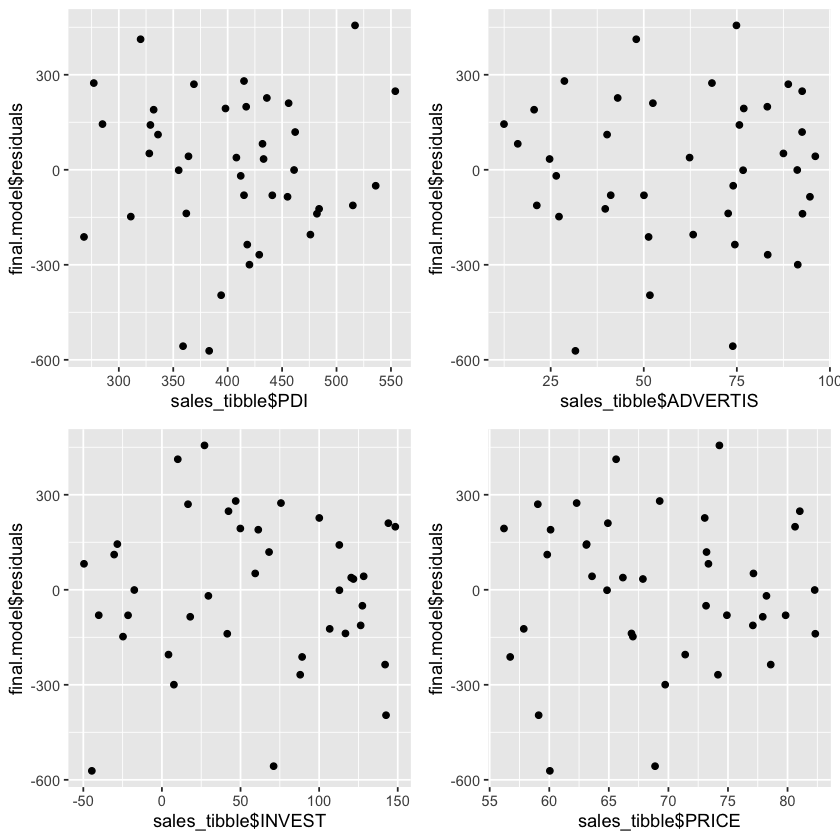

In [53]:
grid.arrange(g1, g2, g3, g4)